# 📃 Phân tích doanh số bán hàng của amazon trong năm 2025

#### 💰 BẠN ĐANG LÀ NHÂN VIÊN PHÂN TÍCH DỮ LIỆU CỦA AMAZON VÀ BẠN ĐANG PHÂN TÍCH VỀ DỮ LIỆU BÁN HÀNG CỦA CÔNG TY TRONG NĂM 2025

### 📝 B1. Xác định vấn đề

In [24]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import joblib as jb

palettes = [
# Bộ màu mặc định (Categorical Palettes)
"deep", "muted", "bright", "pastel", "dark", "colorblind",

# Bộ màu Gradient (Sequential Palettes)
"Blues", "Reds", "Greens", "coolwarm", "magma", "viridis"
]

### 📥 B2. Thu thập dữ liệu

In [25]:
# Load dataset
data = pd.read_csv("C:\DATA\Data thô\Sales_amazon.csv")
data

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60.0,3.0,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100.0,4.0,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60.0,2.0,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60.0,3.0,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10/3/2025,Smartwatch,Electronics,150.0,3.0,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
249,ORD0250,19-02-25,NaN,Electronics,500.0,4.0,2000,Emily Johnson,Seattle,Amazon Pay,Completed
250,ORD0242,8/3/2025,Smartphone,Electronics,500.0,4.0,2000,Chris White,Boston,Gift Card,Pending
251,ORD0242,8/3/2025,Smartphone,Electronics,500.0,4.0,2000,Chris White,Boston,Gift Card,Pending
252,ORD0242,8/3/2025,Smartphone,Electronics,500.0,4.0,2000,Chris White,Boston,Gift Card,Pending


In [26]:
data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60.0,3.0,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100.0,4.0,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60.0,2.0,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60.0,3.0,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10/3/2025,Smartwatch,Electronics,150.0,3.0,450,Emma Clark,New York,Debit Card,Pending


In [27]:
data.tail()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
249,ORD0250,19-02-25,NaN,Electronics,500.0,4.0,2000,Emily Johnson,Seattle,Amazon Pay,Completed
250,ORD0242,8/3/2025,Smartphone,Electronics,500.0,4.0,2000,Chris White,Boston,Gift Card,Pending
251,ORD0242,8/3/2025,Smartphone,Electronics,500.0,4.0,2000,Chris White,Boston,Gift Card,Pending
252,ORD0242,8/3/2025,Smartphone,Electronics,500.0,4.0,2000,Chris White,Boston,Gift Card,Pending
253,ORD0242,8/3/2025,Smartphone,Electronics,500.0,4.0,2000,Chris White,Boston,Gift Card,Pending


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           254 non-null    object 
 1   Date               254 non-null    object 
 2   Product            233 non-null    object 
 3   Category           240 non-null    object 
 4   Price              237 non-null    float64
 5   Quantity           238 non-null    float64
 6   Total Sales        254 non-null    int64  
 7   Customer Name      254 non-null    object 
 8   Customer Location  243 non-null    object 
 9   Payment Method     254 non-null    object 
 10  Status             254 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 22.0+ KB


In [29]:
data.shape

(254, 11)

---------------------------------------------------------------------------------------------------------------------------------
🧐 ***Tổng quát về dữ liêu***  
- *Dữ liệu được thu thập từ các kênh thương mại điện tử của amazon đưa vào cơ sở dữ liệu , kho dữ liệu và được lấy ra bằng SQL PostGress*  
- *Tập dữ liệu nói về 250 bản ghi về giao dịch bán hàng của Amazon, bao gồm thông tin chi tiết về sản phẩm đã bán, khách hàng, phương thức thanh toán và trạng thái đơn hàng*  
- *Tập dữ liệu bao gồm những thông tin cơ bản sau*  
    + *Dataset có tổng cộng 254 sample*  
    + *Dữ liệu có 11 feature(columns) bao gồm* :  
            <div style="margin-left: 40px" >
            *Oder ID: Nói về mã cảu sản phảm bán hàng*  
            *Date: Nói về ngày bán hàng của sản phẩm*  
            *Product: Sản phẩm mà kênh thương mại điện tử bán*  
            *Categorical: Loại sản phẩm mà kên thương mại điện tử bán*  
            *Pricec: Giá thành của sản phẩm*  
            *Quantity: Đánh giá của khách hàng về sản phẩm đó*  
            *Total Sales: tổng doanh thu nhận được từ mặt hàng và loại sản phẩm đó*  
            *Customer Name: Tên của khách hàng mua*  
            *Customer Location: tên địa chỉ nhà cảu khách hàng đang ở*  
            *Payment Method: Phương thức thanh toán*  
            *Staus: trạng thái đã thanh thoán hay chưa*  
            </div>
    + *Trong đó có 2 cột có kiểu dữ liệu float là **(Price, Quantity)**, có 1 cột có kiểu dữ liệu int là **(Total Sale)**, và có 8 cột có kiểu dữ liệu object là **(Order_ID, Date, Product, Category, Customer_Name, Customer_Location, Payment_Method, Status)**
----------------------------------------------------------------------------------------------------------------------------------

### 🧹 B3. Xử lý dữ liệu

+ 🧽 Làm sạch dữ liệu và xử lý các giá trị thiếu

In [30]:
data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60.0,3.0,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100.0,4.0,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60.0,2.0,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60.0,3.0,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10/3/2025,Smartwatch,Electronics,150.0,3.0,450,Emma Clark,New York,Debit Card,Pending


In [31]:
null_columns = data.columns[data.isnull().any()].to_list()
null_columns

['Product', 'Category', 'Price', 'Quantity', 'Customer Location']

In [32]:
total_null_a_column = data.isnull().sum().sort_values().reset_index()
total_null_a_column

,index,0
0,Order ID,0
1,Date,0
2,Total Sales,0
3,Customer Name,0
4,Status,0
5,Payment Method,0
6,Customer Location,11
7,Category,14
8,Quantity,16
9,Price,17


C:\Users\HP Victus\AppData\Local\Temp\ipykernel_13184\456599398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index',


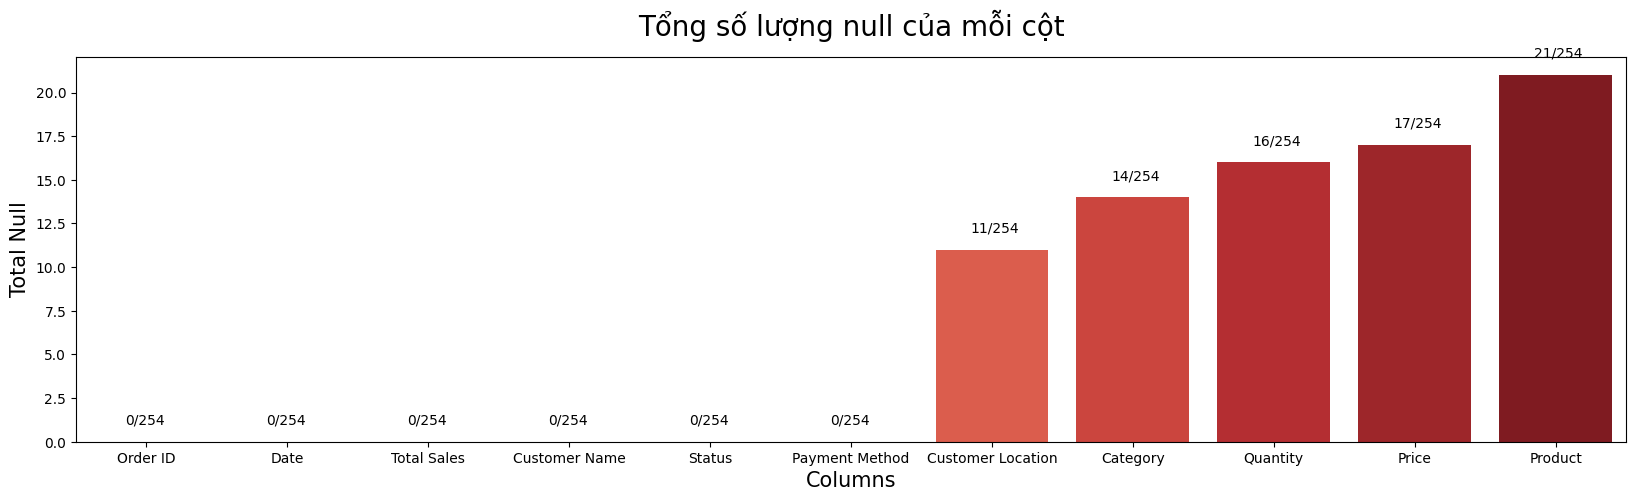

In [33]:
plt.figure(figsize=(20,5))
sns.barplot(x='index',
            y=0,
            data=total_null_a_column,
            palette='Reds');

plt.title("Tổng số lượng null của mỗi cột",fontsize=20,pad=15)
plt.xlabel("Columns",fontsize=15)
plt.ylabel("Total Null",fontsize=15)
null_percent = []

for i in range(len(total_null_a_column[0])):
    percent = (total_null_a_column[0][i]/len(data))*100
    null_percent.append(percent)
    
x = [i for i in range(len(total_null_a_column))]

for x,y in zip(x,total_null_a_column[0]):
    plt.text(x-0.15,y+1,str(y)+"/"+str(len(data)))


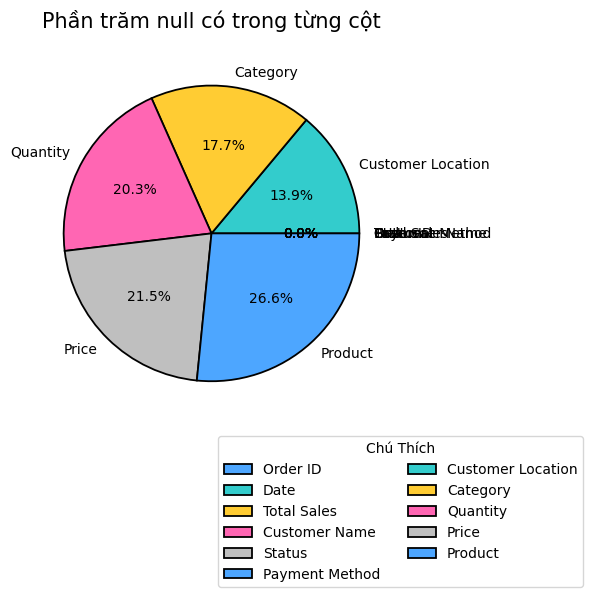

In [34]:
plt.pie(null_percent,
        labels=total_null_a_column['index'],
        autopct="%1.1f%%",
        colors = ['#4da6ff', '#33cccc', '#ffcc33', '#ff66b3', '#bfbfbf'],
        wedgeprops={'edgecolor':'black','linewidth' : 1.3});

plt.title("Phần trăm null có trong từng cột",fontsize=15,pad=15)

plt.legend(
    loc='upper left',
    bbox_to_anchor=(0.5, -0.03),
    ncol=2, 
    fontsize=10,
    title='Chú Thích'
)

In [35]:
for i in range(len(null_columns)):
    if(data[null_columns[i]].dtype == 'O'):
        data[null_columns[i]].fillna(data[null_columns[i]].mode()[0],inplace=True)
    elif(data[null_columns[i]].dtype in ['float','int']):
        data[null_columns[i]].fillna(data[null_columns[i]].median(),inplace=True)

C:\Users\HP Victus\AppData\Local\Temp\ipykernel_13184\1391152328.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[null_columns[i]].fillna(data[null_columns[i]].mode()[0],inplace=True)
C:\Users\HP Victus\AppData\Local\Temp\ipykernel_13184\1391152328.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [36]:
data.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

+ ♻️ Xử lý các giá trị trùng lặp

In [37]:
data.duplicated().sum()

np.int64(4)

In [38]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

np.int64(0)

+ 🔄 Chuyển đổi kiểu dữ liệu

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           250 non-null    object 
 1   Date               250 non-null    object 
 2   Product            250 non-null    object 
 3   Category           250 non-null    object 
 4   Price              250 non-null    float64
 5   Quantity           250 non-null    float64
 6   Total Sales        250 non-null    int64  
 7   Customer Name      250 non-null    object 
 8   Customer Location  250 non-null    object 
 9   Payment Method     250 non-null    object 
 10  Status             250 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 23.4+ KB


In [40]:
data['Date']


0       14-03-25
1       20-03-25
2       15-02-25
3       19-02-25
4      10/3/2025
         ...    
245     17-03-25
246     30-03-25
247     5/3/2025
248     8/3/2025
249     19-02-25
Name: Date, Length: 250, dtype: object

In [41]:
new_date = []

for i in range(len(data['Date'])):
    temp = data['Date'][i]
    if('-' in temp):
        result = temp.split('-')
        new_date.append(result)
    elif('/' in temp):
        result = temp.split('/')
        new_date.append(result)
new_date = pd.DataFrame(new_date,columns=['Ngày','tháng','năm'])
print(new_date)

    Ngày tháng   năm
0     14    03    25
1     20    03    25
2     15    02    25
3     19    02    25
4     10     3  2025
..   ...   ...   ...
245   17    03    25
246   30    03    25
247    5     3  2025
248    8     3  2025
249   19    02    25

[250 rows x 3 columns]


In [42]:
new_columns = new_date.columns.to_list()
new_columns
for i in range(len(new_columns)):
    data[new_columns[i]] = new_date[new_columns[i]]
data = data.drop(columns=['năm','Date'])
data

C:\Users\HP Victus\AppData\Local\Temp\ipykernel_13184\3192343563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_columns[i]] = new_date[new_columns[i]]
C:\Users\HP Victus\AppData\Local\Temp\ipykernel_13184\3192343563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_columns[i]] = new_date[new_columns[i]]
C:\Users\HP Victus\AppData\Local\Temp\ipykernel_13184\3192343563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Order ID,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,Ngày,tháng
0,ORD0001,Running Shoes,Footwear,60.0,3.0,180,Emma Clark,New York,Debit Card,Cancelled,14,03
1,ORD0002,Headphones,Electronics,100.0,4.0,400,Emily Johnson,San Francisco,Debit Card,Pending,20,03
2,ORD0003,Running Shoes,Footwear,60.0,2.0,120,John Doe,Denver,Amazon Pay,Cancelled,15,02
3,ORD0004,Running Shoes,Footwear,60.0,3.0,180,Olivia Wilson,Dallas,Credit Card,Pending,19,02
4,ORD0005,Smartwatch,Electronics,150.0,3.0,450,Emma Clark,New York,Debit Card,Pending,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,T-Shirt,Clothing,20.0,2.0,40,Daniel Harris,Miami,Debit Card,Cancelled,17,03
246,ORD0247,Jeans,Clothing,40.0,1.0,40,Sophia Miller,Dallas,Debit Card,Cancelled,30,03
247,ORD0248,T-Shirt,Clothing,20.0,2.0,40,Chris White,Denver,Debit Card,Cancelled,5,3
248,ORD0249,Smartwatch,Electronics,150.0,3.0,450,Emily Johnson,New York,Debit Card,Cancelled,8,3


In [ ]:
data['Ngày'] = data['Ngày'].astype(int)
data['tháng'] = data['tháng'].astype(int)

In [ ]:
jb.dump(data,'data_clean.pkl')

['data_clean.pkl']